In [1]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import ShallowNet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.datasets import cifar10
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("resources/"))

[INFO] loading images...


In [3]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()
# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

[INFO] processed 500/800


In [4]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [5]:
# convert the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.fit_transform(testY)
trainY = np.hstack((trainY, 1-trainY))
testY = np.hstack((testY, 1-testY))

In [6]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(learning_rate=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 65538     
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the network
print("[INFO] training network...")
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY),
	batch_size=100, epochs=1000, verbose=1)

[INFO] training network...
Epoch 1/1000
6/6 [==============================] - 1s 97ms/step - loss: 0.7082 - accuracy: 0.5033 - val_loss: 0.7330 - val_accuracy: 0.5100
Epoch 2/1000
6/6 [==============================] - 0s 55ms/step - loss: 0.7182 - accuracy: 0.5117 - val_loss: 0.6846 - val_accuracy: 0.6250
Epoch 3/1000
6/6 [==============================] - 0s 54ms/step - loss: 0.6982 - accuracy: 0.5283 - val_loss: 0.6823 - val_accuracy: 0.6500

In [9]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       102
           1       0.84      0.73      0.78        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



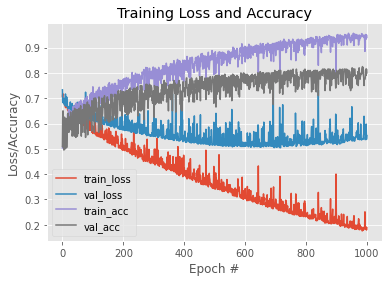

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 1000), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 1000), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 1000), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 1000), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()